In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.shape

(8425, 23)

In [5]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [6]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
data.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [8]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [9]:
lab_enc= LabelEncoder()

In [10]:
data.drop(['Date'],axis=1,inplace=True)

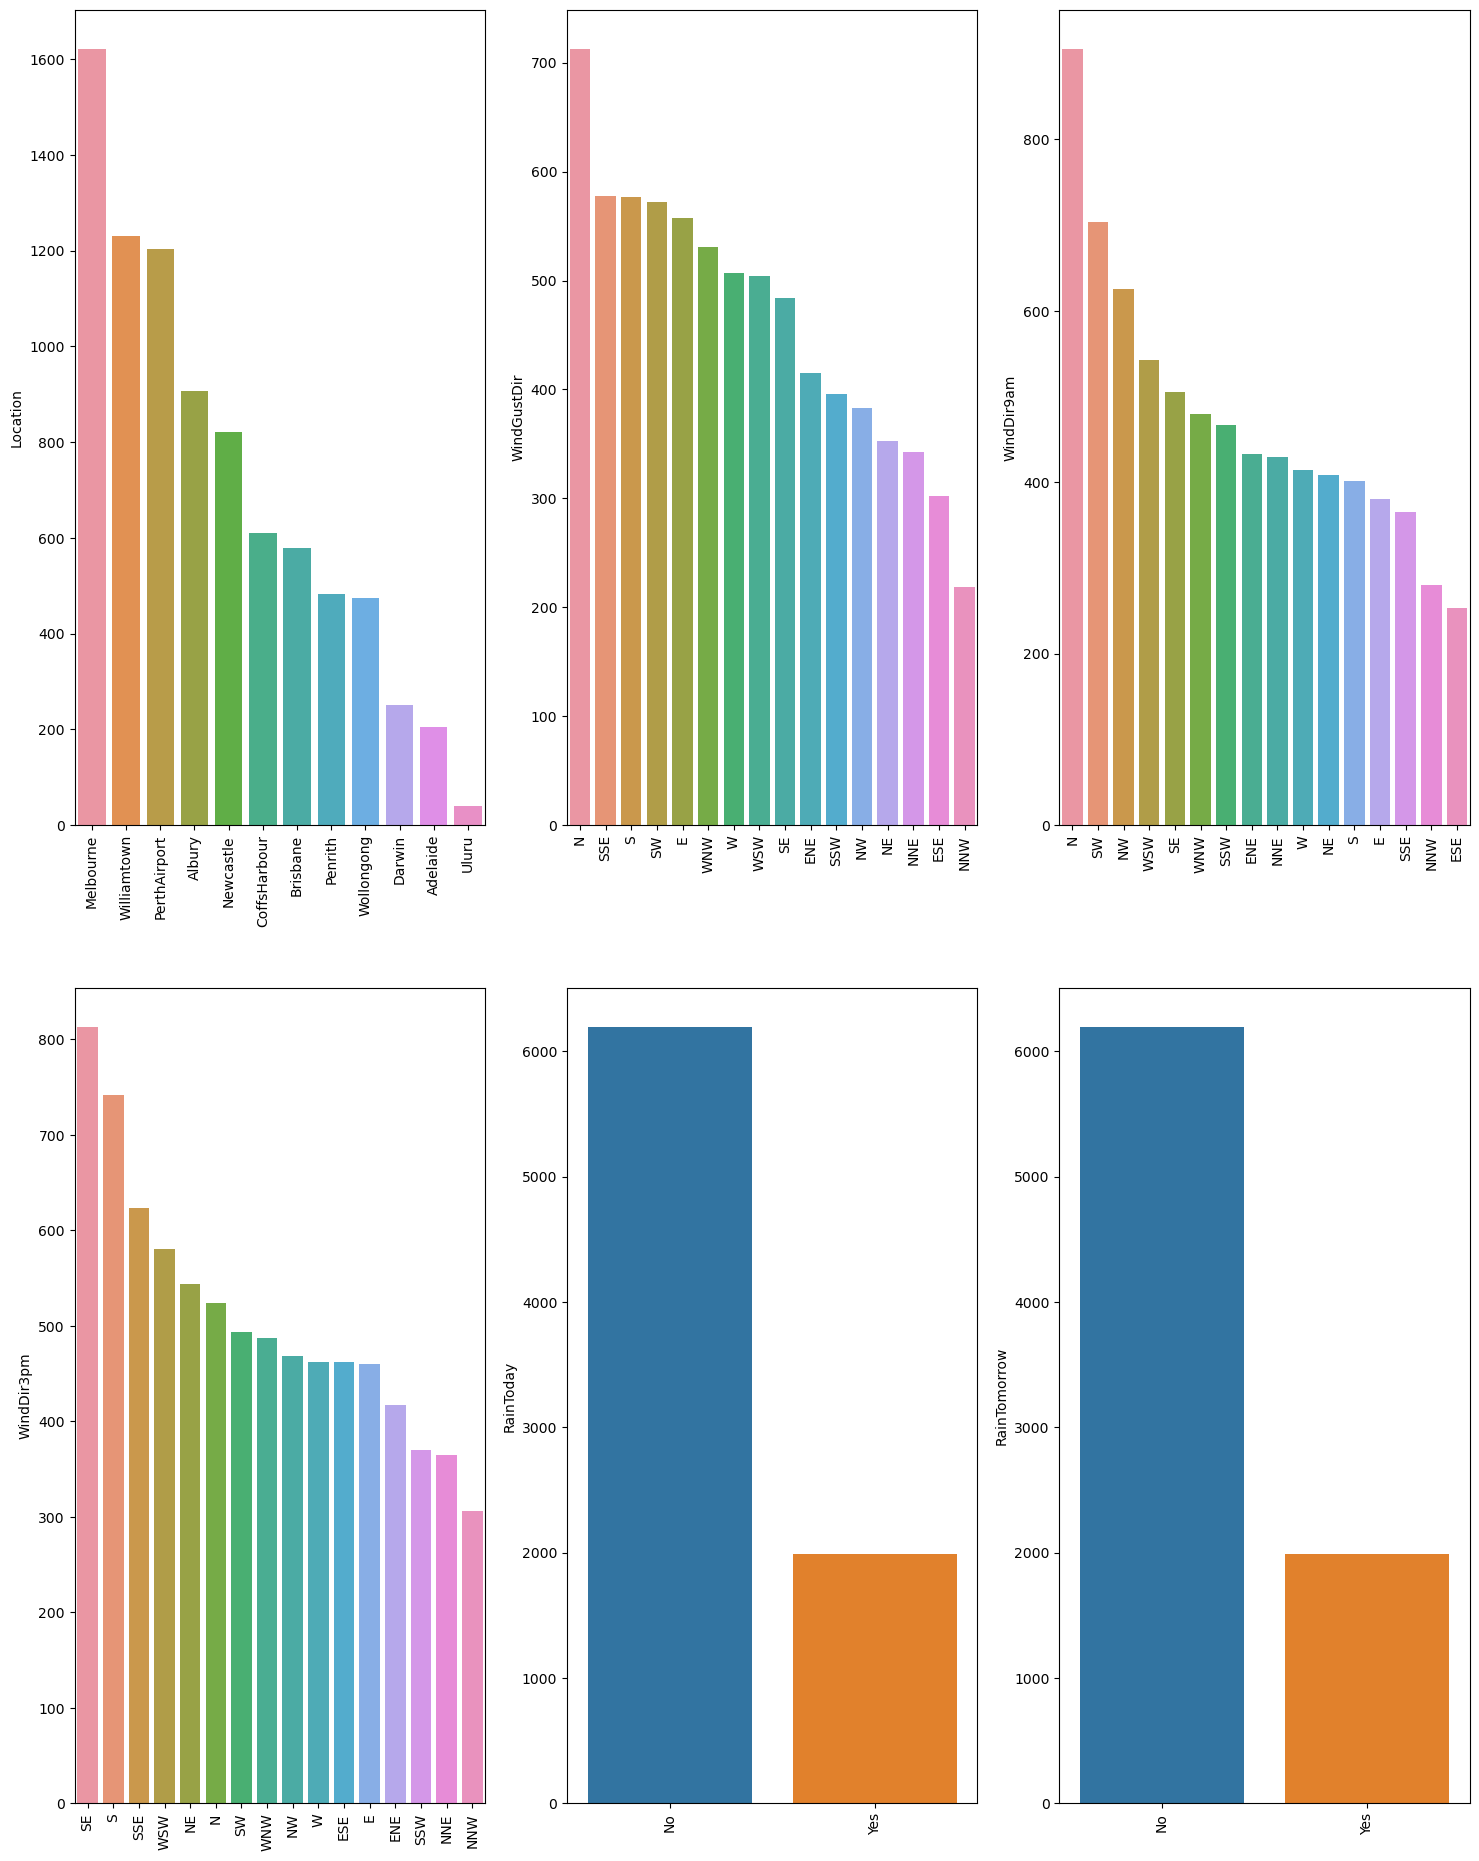

In [11]:
obj= (data.dtypes== 'object')
object_cols= list(obj[obj].index)
plt.figure(figsize=(18,36))
index=1
for col in object_cols:
    y=data[col].value_counts()
    plt.subplot(3,3,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index),y=y)
    index+=1
plt.show()


In [12]:
for col in list(obj[obj].index):
    data[col]= lab_enc.fit_transform(data[col])

Changing the type of data(object to float64/int64) to make it easy for comparison.

In [13]:
data.fillna(data.mean(),inplace=True)

In [14]:
data.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [15]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0


In [16]:
features= list(data.select_dtypes(include= np.number).columns)
print(features)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


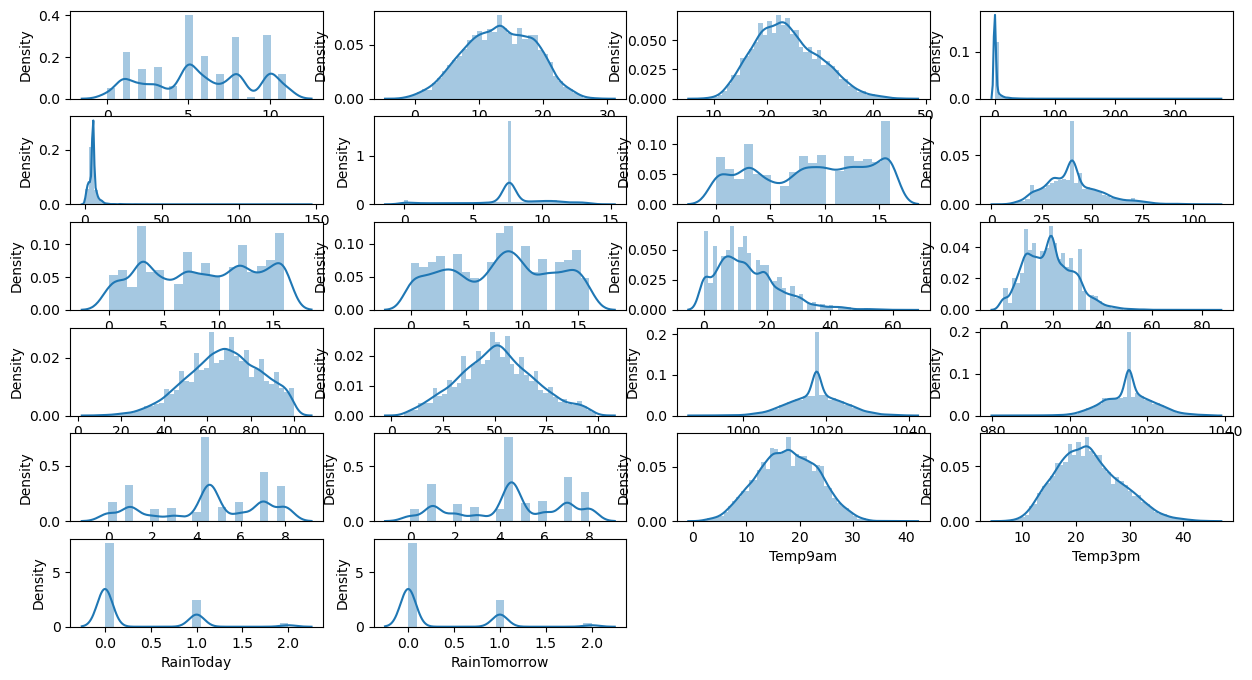

In [17]:
plt.figure(figsize=(15,8))
for i, col in enumerate(features):
    plt.subplot(6,4,i+1)
    sns.distplot(data[col])
plt.show()

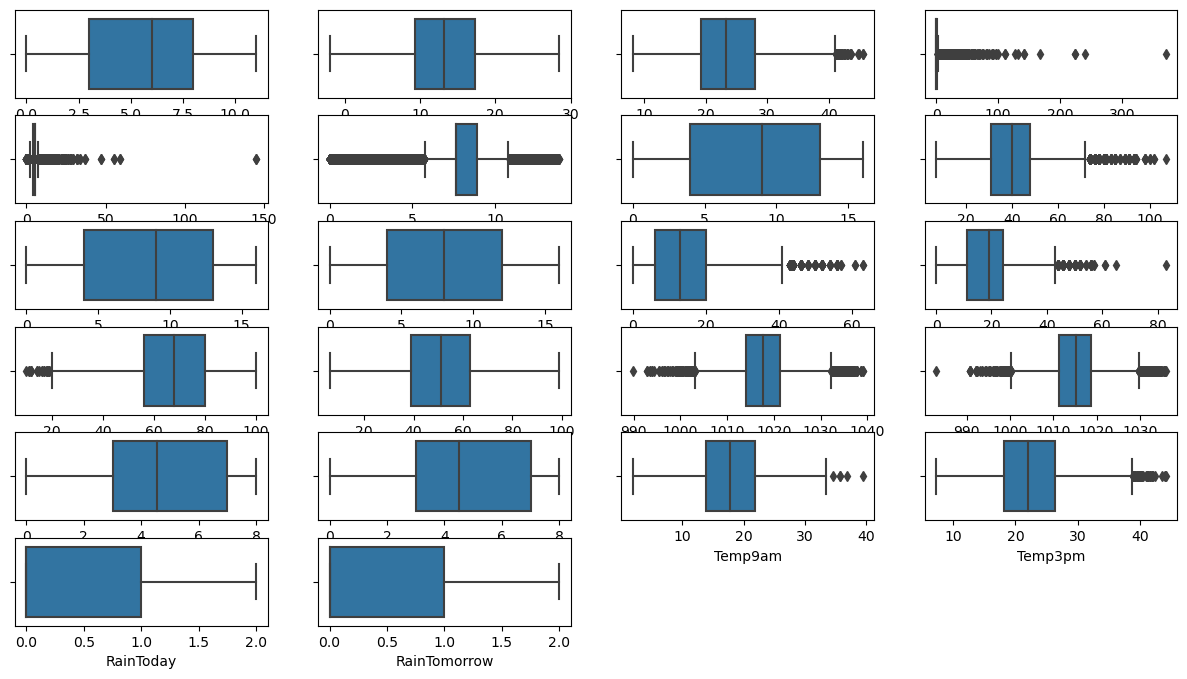

In [18]:
plt.figure(figsize=(15,8))
for i, col in enumerate(features):
    plt.subplot(6,4,i+1)
    sns.boxplot(data[col])
plt.show()

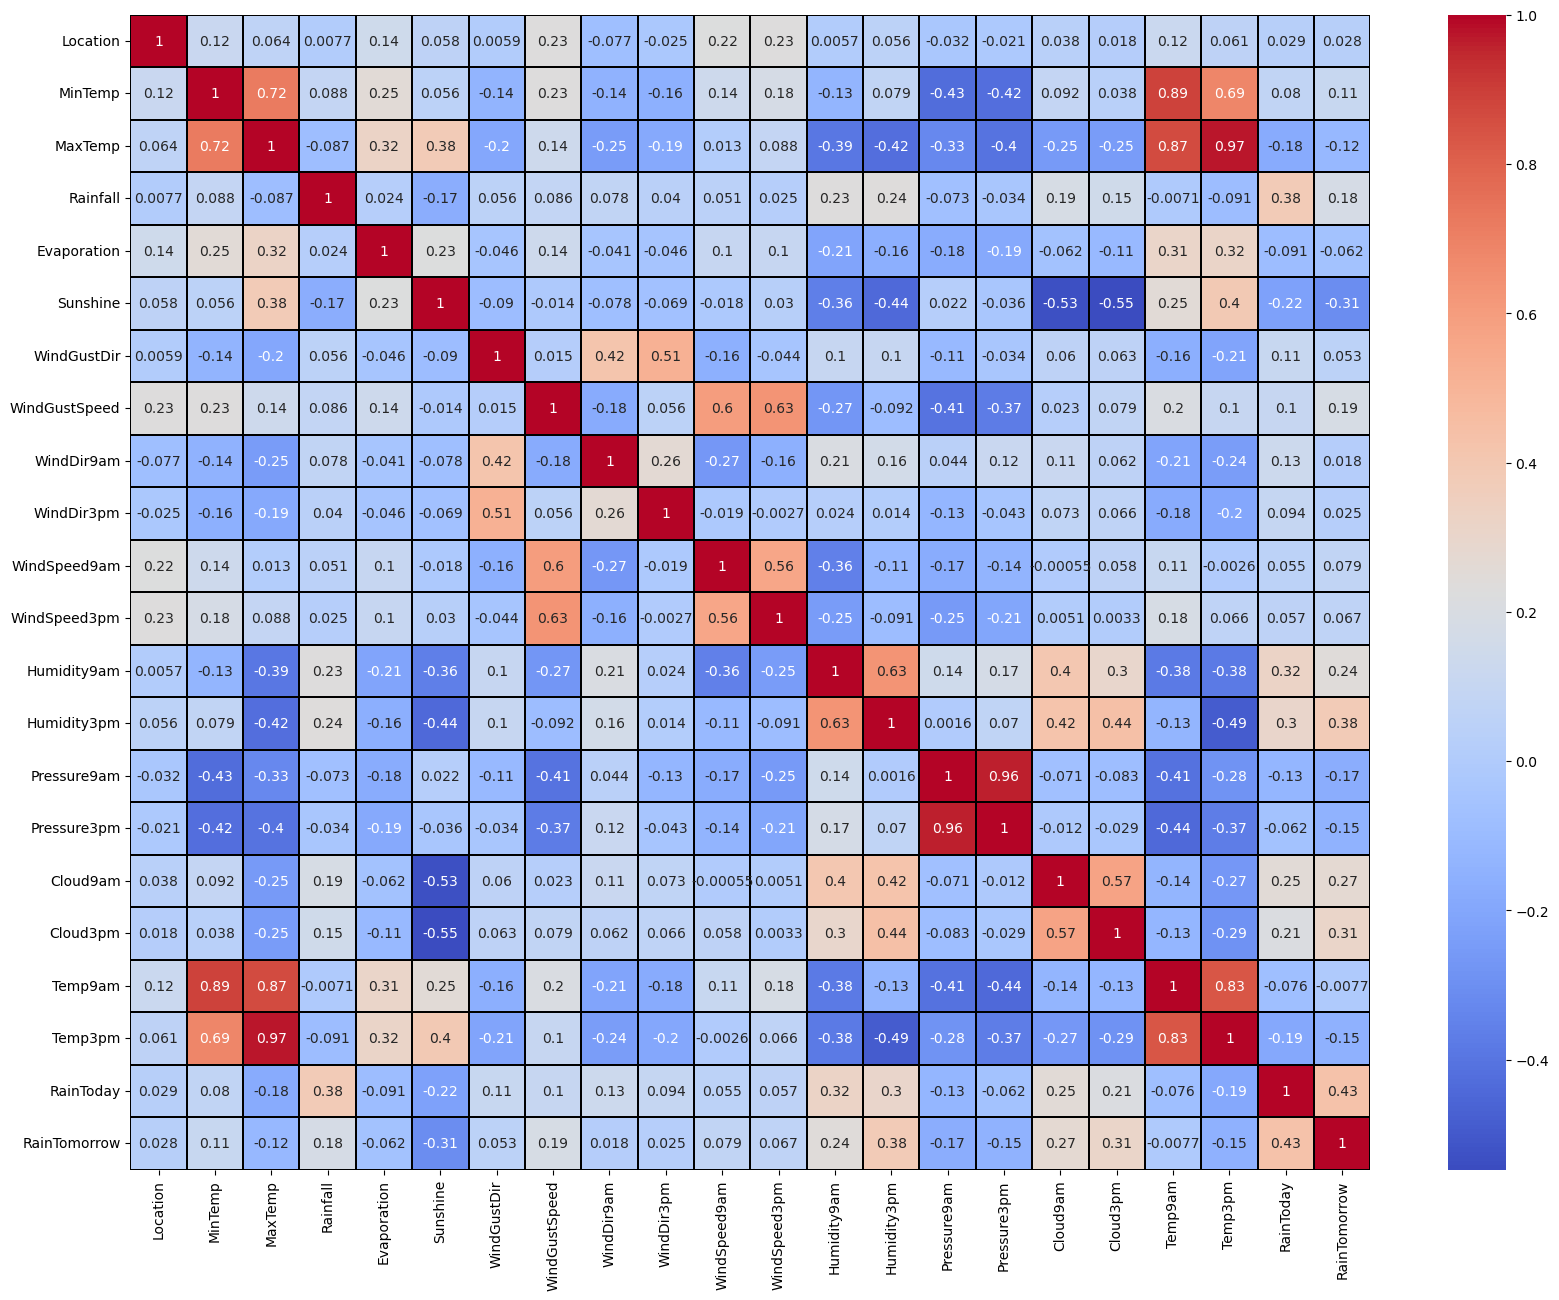

In [19]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',linewidths= 0.2, linecolor='black')
plt.show()

Rain tomorrow and Rainfall are highly correlated with Rain today, Humidity, Cloud.

In [20]:
X_s= data.drop(columns=['Rainfall','RainTomorrow'])
y_rf= data['Rainfall']
y_rt= data['RainTomorrow']

In [21]:
scaler= StandardScaler()
X= scaler.fit_transform(X_s)

In [22]:
X_train, X_test, y_rf_train, y_rf_test, y_rt_train, y_rt_test= train_test_split(X, y_rf, y_rt, test_size=0.2, random_state=100)

TEST SCORE

In [23]:
lr= LinearRegression()
knn= KNeighborsRegressor()
rfc= RandomForestRegressor()
dtc= DecisionTreeRegressor()

In [24]:
cls= {"Linear Regression": lr, "KNeighbour Regressor":knn, "Random Forest Regressor":rfc, "Decision Tree Regressor":dtc}

In [25]:
for name, regressor in cls.items():
    regressor.fit(X_train,y_rf_train)
    y_rf_pred= regressor.predict(X_test)
    y_rf_mse= mean_squared_error(y_rf_test,y_rf_pred)
    print(f"{name} - Mean Squared Error: {y_rf_mse}")

Linear Regression - Mean Squared Error: 163.59418369550724
KNeighbour Regressor - Mean Squared Error: 158.51433936350298
Random Forest Regressor - Mean Squared Error: 131.96611556967176
Decision Tree Regressor - Mean Squared Error: 152.49801186943623


In [26]:
for name, regressor in cls.items():
    regressor.fit(X_train,y_rt_train)
    y_rt_pred= regressor.predict(X_test)
    y_rt_mse= mean_squared_error(y_rt_test,y_rt_pred)
    print(f"{name} - Mean Squared Error: {y_rt_mse}")

Linear Regression - Mean Squared Error: 0.1580862713453367
KNeighbour Regressor - Mean Squared Error: 0.15774480712166175
Random Forest Regressor - Mean Squared Error: 0.09110359126249405
Decision Tree Regressor - Mean Squared Error: 0.16142433234421366


The amount of Rainfall prediction for the day is 163 mm using Linear Regression
and the prediction for Rain Tomorrow is 15% using Linear Regression and is same with KNeighbour Regressor whereas it is 16% using Decision Tree Regressor.

TRAIN SCORE

In [27]:
for name, regressor in cls.items():
    regressor.fit(X_train,y_rf_train)
    y_rf_pred= regressor.predict(X_train)
    y_rf_mse= mean_squared_error(y_rf_train,y_rf_pred)
    print(f"{name} - Mean Squared Error: {y_rf_mse}")


Linear Regression - Mean Squared Error: 67.08692721930927
KNeighbour Regressor - Mean Squared Error: 39.08242033755508
Random Forest Regressor - Mean Squared Error: 5.544606287458294
Decision Tree Regressor - Mean Squared Error: 1.1015457471106819e-30


In [28]:
for name, regressor in cls.items():
    regressor.fit(X_train,y_rt_train)
    y_rt_pred= regressor.predict(X_train)
    y_rt_mse= mean_squared_error(y_rt_train,y_rt_pred)
    print(f"{name} - Mean Squared Error: {y_rt_mse}")

Linear Regression - Mean Squared Error: 0.18274276926286326
KNeighbour Regressor - Mean Squared Error: 0.11250445103857568
Random Forest Regressor - Mean Squared Error: 0.014804935916091704
Decision Tree Regressor - Mean Squared Error: 0.00013353115727002965


The amount of Rainfall prediction with train data is 67mm using Linear Regression whereas the rain tomorrow prediction is 18% using Linear Regression.